In [237]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/handwritten-digit-identification-b1/sample_submission.csv
/kaggle/input/handwritten-digit-identification-b1/train.csv
/kaggle/input/handwritten-digit-identification-b1/test.csv


In [ ]:
# https://www.kaggle.com/competitions/handwritten-digit-identification-b1

In [262]:
data = pd.read_csv("/kaggle/input/handwritten-digit-identification-b1/train.csv", header=None)
test = pd.read_csv("/kaggle/input/handwritten-digit-identification-b1/test.csv", header=None)
ss = pd.read_csv("/kaggle/input/handwritten-digit-identification-b1/sample_submission.csv")

In [263]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1,0,0,3,11,16,15,0,0,0,...,0,0,0,3,15,16,9,0,0,8
1,2,0,0,0,10,12,3,0,0,0,...,0,0,0,2,10,14,13,4,0,8
2,3,0,0,3,10,15,8,0,0,0,...,0,0,0,2,10,8,0,0,0,5
3,4,0,0,5,11,16,16,8,0,0,...,0,0,0,7,16,11,2,0,0,3
4,5,0,0,4,12,16,16,4,0,0,...,0,0,0,3,12,13,9,0,0,2


In [264]:
X = data.drop([1, 65], axis=1).values
y = data.iloc[:, 65].values
test = test.drop([1], axis=1)
X.shape

(1430, 64)

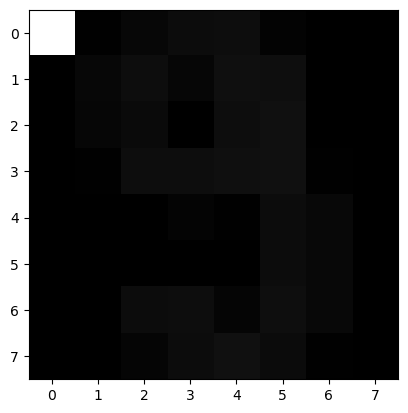

In [265]:
# visualizing a random digit
import matplotlib.pyplot as plt

# increase brightness to view
plt.imshow(X[240].reshape(8, 8), cmap='gray')
# plt.imshow(X_train[50].reshape(8, 8), cmap='gray')
# plt.imshow(X_train[500].reshape(8, 8), cmap='gray')

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train

array([[ 307,    0,    5, ...,    9,    0,    0],
       [1141,    0,    9, ...,    6,    0,    0],
       [  32,    0,    0, ...,   16,    2,    0],
       ...,
       [1295,    0,    3, ...,   16,    6,    0],
       [ 861,    1,    8, ...,    4,    0,    0],
       [1127,    0,    9, ...,    0,    0,    0]])

In [267]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_data = sc.transform(test)

In [268]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


(1144, 64)
(286, 64)
(1144,)
(286,)


In [269]:
from sklearn.neural_network import MLPClassifier

In [270]:
mlp = MLPClassifier(max_iter=200, activation='relu', hidden_layer_sizes=(64, 32), random_state=42, solver='adam', learning_rate_init=0.005)
print(mlp)

MLPClassifier(hidden_layer_sizes=(64, 32), learning_rate_init=0.005,
              random_state=42)


In [271]:
model = mlp.fit(X_train, y_train)

In [272]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

In [273]:
num_folds = 5  # Number of folds for cross-validation
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [274]:
scores = cross_val_score(mlp, X_train, y_train, cv=5)
scores 

array([0.96943231, 0.9650655 , 0.9650655 , 0.96069869, 0.97368421])

In [275]:
print("Mean Accuracy:", scores.mean())

Mean Accuracy: 0.9667892438519881


In [276]:
scores = cross_val_score(mlp, X_test, y_test, cv=5)
scores 

array([0.89655172, 0.85964912, 0.9122807 , 0.96491228, 0.96491228])

In [277]:
print("Mean Accuracy:", scores.mean())

Mean Accuracy: 0.9196612220205687


In [289]:
#finding best params
from sklearn.metrics import accuracy_score

i = 0
df = pd.DataFrame(columns = ['alpha','max_iter','train_acc','test_acc'])
for a in [0.00001,0.0001,0.001,0.01, 0.1, 1, 10]:
    for mi in [10,100,200,500,1000,2000]:
        mlp = MLPClassifier(alpha=a, max_iter=mi, random_state=42)
        mlp.fit(X_train, y_train)
        
        acc_tr = accuracy_score(y_train, mlp.predict(X_train)) # Train Accuracy
        acc = accuracy_score(y_test, mlp.predict(X_test)) # Test Accuracy
        df.loc[i] = [a,mi,acc_tr,acc]
        i=i+1

In [290]:
df

,alpha,max_iter,train_acc,test_acc
0,0.00001,10.0,0.929196,0.863636
1,0.00001,100.0,1.000000,0.965035
2,0.00001,200.0,1.000000,0.968531
3,0.00001,500.0,1.000000,0.968531
4,0.00001,1000.0,1.000000,0.968531
5,0.00001,2000.0,1.000000,0.968531
6,0.00010,10.0,0.929196,0.863636
7,0.00010,100.0,1.000000,0.965035
8,0.00010,200.0,1.000000,0.968531
9,0.00010,500.0,1.000000,0.968531


In [291]:
final_mlp = MLPClassifier(max_iter=200, random_state=42, learning_rate_init=0.001)

In [292]:
final_model = final_mlp.fit(X_train, y_train)

In [293]:
final_pred = final_model.predict(test_data)
final_pred 

array([4, 6, 5, 3, 4, 4, 7, 1, 0, 8, 3, 5, 7, 2, 3, 0, 3, 9, 4, 0, 2, 6,
       6, 2, 7, 4, 5, 0, 8, 8, 5, 7, 3, 4, 4, 4, 4, 8, 1, 5, 9, 9, 9, 4,
       3, 9, 0, 4, 3, 0, 9, 2, 6, 4, 8, 0, 1, 4, 9, 5, 7, 3, 9, 7, 4, 9,
       2, 3, 2, 4, 6, 4, 6, 8, 5, 0, 9, 7, 0, 9, 9, 0, 9, 8, 9, 7, 1, 5,
       4, 8, 0, 8, 8, 8, 6, 4, 2, 5, 6, 8, 7, 3, 6, 3, 2, 8, 5, 3, 9, 6,
       8, 1, 1, 7, 9, 8, 1, 4, 5, 5, 4, 1, 0, 1, 4, 4, 3, 1, 3, 2, 7, 6,
       9, 0, 8, 3, 2, 3, 9, 5, 6, 4, 8, 2, 7, 6, 9, 0, 3, 0, 5, 2, 5, 4,
       0, 1, 5, 5, 3, 2, 5, 0, 7, 4, 3, 4, 1, 6, 1, 5, 7, 0, 9, 2, 5, 4,
       1, 9, 6, 7, 6, 9, 9, 3, 0, 0, 9, 9, 5, 9, 6, 6, 2, 7, 3, 3, 9, 2,
       5, 2, 1, 3, 7, 3, 3, 1, 0, 2, 9, 3, 3, 2, 1, 0, 8, 9, 4, 9, 3, 2,
       1, 0, 5, 1, 4, 0, 1, 3, 8, 0, 4, 1, 0, 9, 1, 1, 5, 0, 4, 3, 1, 6,
       1, 8, 1, 0, 3, 8, 0, 8, 0, 1, 6, 2, 6, 2, 5, 9, 0, 2, 8, 9, 3, 5,
       4, 6, 2, 5, 2, 1, 3, 0, 8, 6, 9, 7, 3, 0, 3, 3, 2, 1, 4, 5, 8, 8,
       8, 0, 4, 6, 7, 0, 4, 2, 6, 0, 5, 2, 0, 9, 1,

In [294]:
ids = ss.iloc[:, 0]
ids

0      1431
1      1432
2      1433
3      1434
4      1435
       ... 
362    1793
363    1794
364    1795
365    1796
366    1797
Name: ID, Length: 367, dtype: int64

In [295]:
final_df = pd.DataFrame({"ID" : ids,
                 "Category" : final_pred})

In [296]:
final_df.to_csv("submission_.csv", index = False)